In [1]:
#Importando as bibliotecas
import numpy as np
import tifffile as tif
import rasterio as rio
import glob
import matplotlib.pyplot as plt
from spectral import imshow

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,16)

In [3]:
## Le as bandas como numpyarray sem onerar a memória.(boa prática)
with rio.open('dados/drone/quadrantes/sp01_proj2_transparent_mosaic_group1_2_2.tif') as src1:
    drone = src1.read()
    metadata = src1.profile
    B1 = src1.read(1)
    B2 = src1.read(2)
    B3 = src1.read(3)
    B4 = src1.read(4)
    

In [4]:
# Define função para reorganiza a ordem do shape da imagem.
def swap_from_rio(img):
    img = img.swapaxes(0,2)
    img = img.swapaxes(0,1)
    return img

In [5]:
img = swap_from_rio(drone)

In [6]:
#Gerando indices:
#NDVI Visível = (Green-Red) / (Green+Red)
#GLI = (2 x G-R-B) / (2 x G+R+B).

np.seterr(divide='ignore', invalid='ignore')# Permite a divisão por zero.
ndviv = (B2 - B1)/(B2 + B1)
GLI = (2*(B2 - B1 - B3))/(2*(B2 + B1 + B3))

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.005235602094240838, 233.0]
    G: [0.005235602094240838, 233.0]
    B: [0.005235602094240838, 233.0]

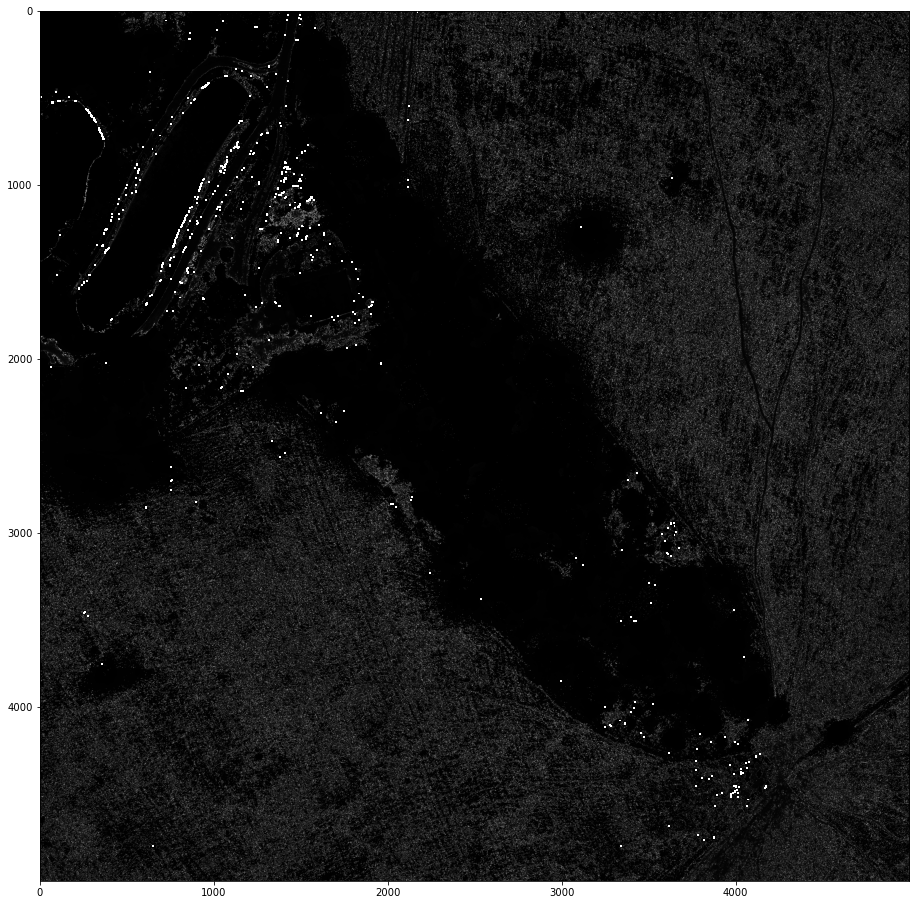

In [7]:
#Plotando NDVI Visivel.
imshow(ndviv, stretch=(0.02,0.98), cmap ='Greys_r')

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.016666666666666666, 22.333333333333332]
    G: [0.016666666666666666, 22.333333333333332]
    B: [0.016666666666666666, 22.333333333333332]

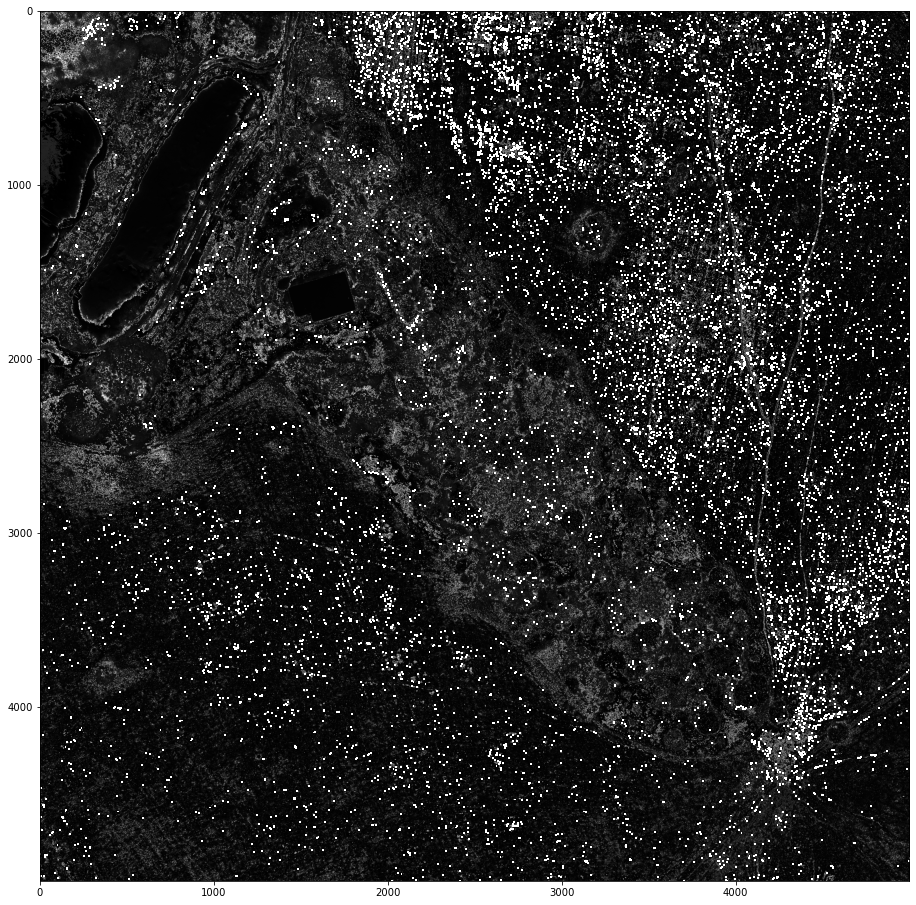

In [8]:
#Plotando GLI.
imshow(GLI, stretch=(0.02,0.98), cmap ='Greys_r')

In [9]:
# Principais componetes com spectral
from spectral import*

In [10]:
# Definindo pc
pc = principal_components(img)

In [11]:
#Redução de dimensionalidade(mantem apenas as PCs que contem 99% dos dados)
pc99 = pc.reduce(fraction=0.99)

In [12]:
#Calculando transformação
img_pc = pc99.transform(img)

ImageView object:
  Display bands       :  (0, 1, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-244.3080072954782, 165.8597097686504]
    G: [-113.2708123626898, 113.09053093684366]
    B: [-56.7671653638502, 41.926519518579425]

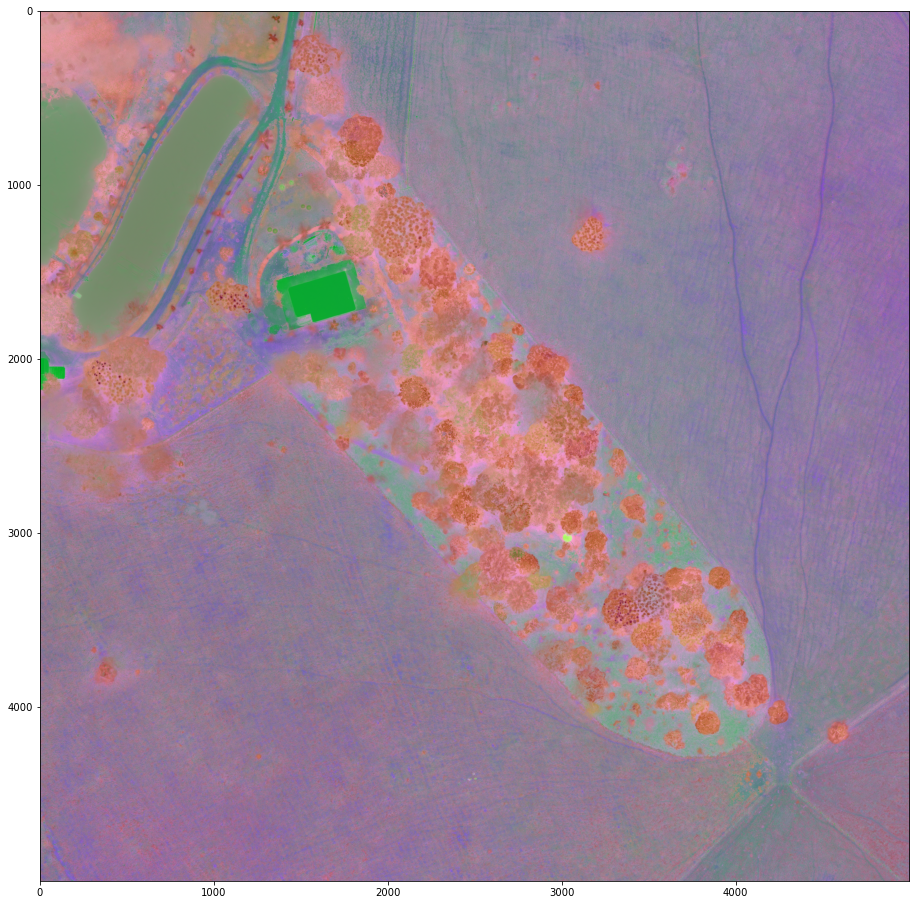

In [15]:
#Vizualizaçãodas Principais componentes com histograma expandido
imshow(img_pc,(0,1,2), figsize=(20,16))

ImageView object:
  Display bands       :  (0, 1, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-70.2794307090145, 109.48600479190307]
    G: [-20.057048856057932, 25.648947199250586]
    B: [-22.69398952453588, 13.219660395718392]

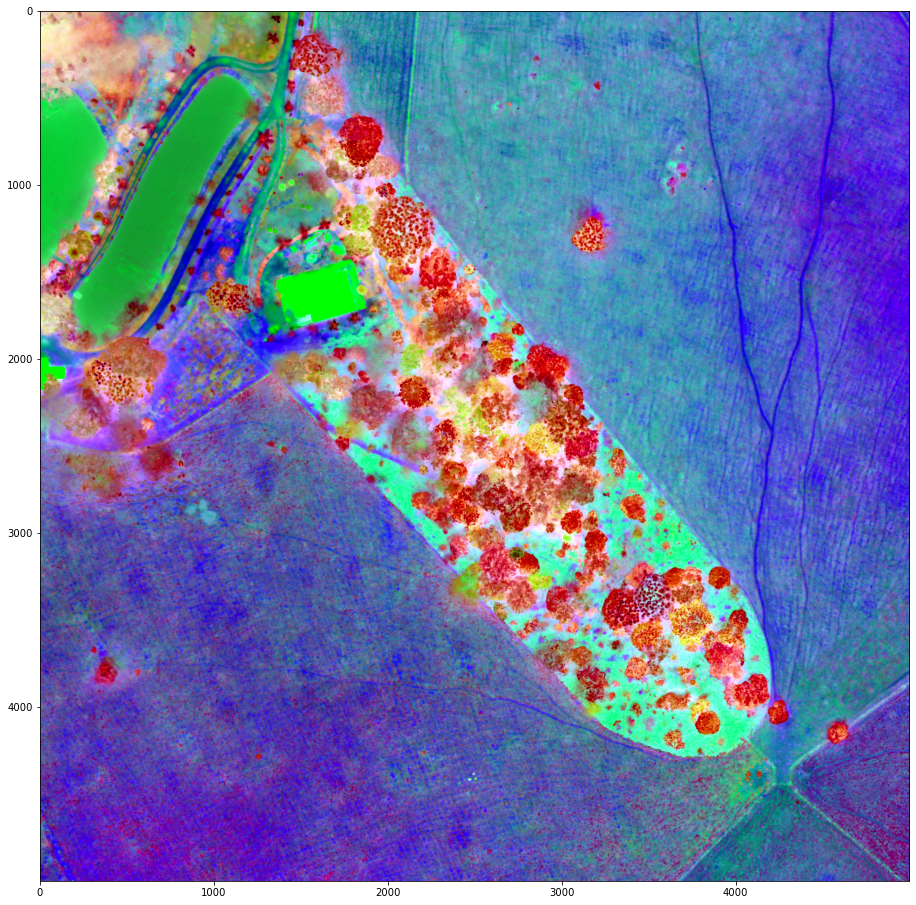

In [14]:
#Vizualizaçãodas Principais componentes com histograma expandido
imshow(img_pc,(0,1,2),stretch=(0.02,0.98), figsize=(20,16))